In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [114]:
mll_results = pd.read_csv('../Spatial/MOB_final_results.csv', index_col=0)

In [115]:
sim_mll_results = pd.read_csv('MOB_sim_results.csv', index_col=0)

In [116]:
sample_info = pd.read_csv('../Spatial/MOB_sample_info.csv', index_col=0)

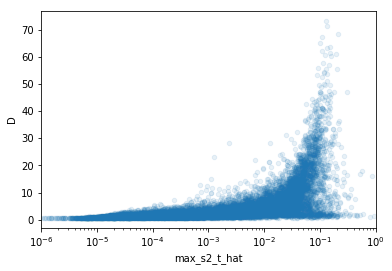

In [117]:
mll_results.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1), alpha=.1);

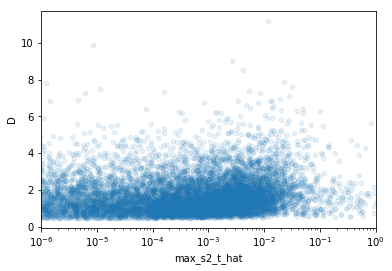

In [118]:
sim_mll_results.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1), alpha=.1);

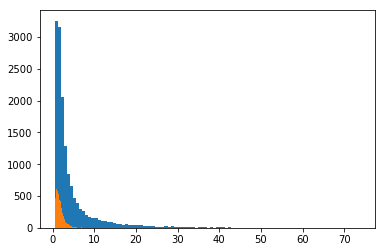

In [119]:
plt.hist(mll_results.D, bins=100);
plt.hist(sim_mll_results.D, bins=100);

In [120]:
tmp = sim_mll_results.D.sort_values().as_matrix()

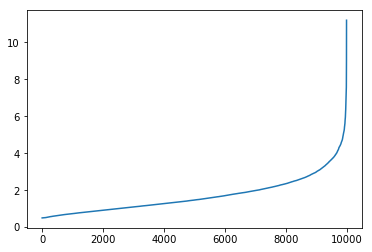

In [121]:
plt.plot(tmp);

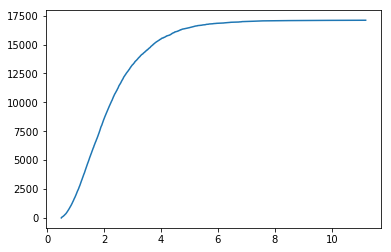

In [122]:
plt.plot(tmp, tmp.cumsum());

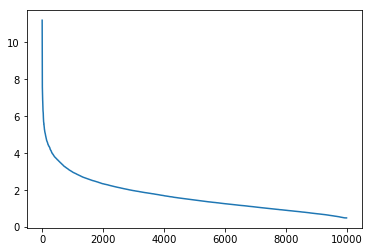

In [123]:
tmp = sim_mll_results.D.sort_values(ascending=False).as_matrix()
plt.plot(tmp);

In [124]:
from scipy import stats

In [125]:
par = stats.gamma.fit(sim_mll_results.D)
par

(1.5246766563275989, 0.48328713969510118, 0.80489947172437382)

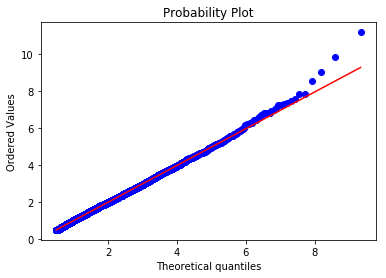

In [126]:
ax = plt.gca()
stats.probplot(tmp, dist=stats.gamma, sparams=par, plot=ax);

In [127]:
gamma_rv = stats.gamma(*par)

In [128]:
gamma_rv.sf(sim_mll_results.D.max())

7.6240119613096387e-06

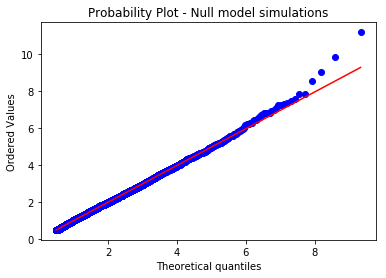

In [198]:
ax = plt.gca()
stats.probplot(sim_mll_results.D, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Null model simulations');
plt.savefig('probplot_MOB_sim_fit.pdf')

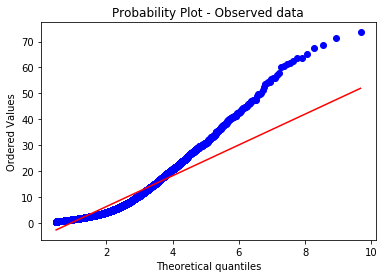

In [199]:
ax = plt.gca()
qq_res = stats.probplot(mll_results.D, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Observed data');
plt.savefig('probplot_MOB_observed_applied.pdf')

In [134]:
pval = gamma_rv.sf(mll_results.D)

In [170]:
mll_results['pval'] = pval

In [178]:
(mll_results.shape[0] * mll_results.pval < 0.05).sum()

1310

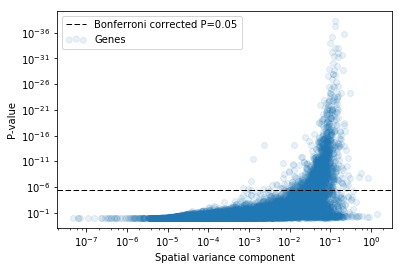

In [197]:
plt.loglog()
plt.scatter(mll_results.max_s2_t_hat, mll_results.pval, alpha=0.1, label='Genes');
plt.gca().invert_yaxis();
plt.axhline(0.05 / mll_results.shape[0], lw=1, linestyle='--', c='k', label='Bonferroni corrected P=0.05')
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');
plt.legend(scatterpoints=3);

In [187]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.D)

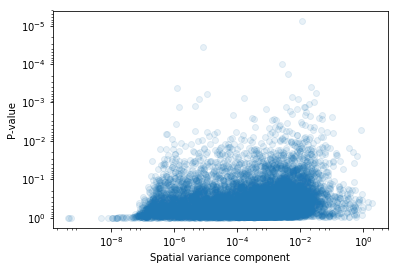

In [188]:
plt.loglog()
plt.scatter(sim_mll_results.max_s2_t_hat, sim_mll_results.pval, alpha=0.1);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');